In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pictures/Average Ride Length per day.png
/kaggle/input/pictures/Most Used Stations.png
/kaggle/input/pictures/Bike Types by user.png
/kaggle/input/pictures/Ride per hour by user.png
/kaggle/input/pictures/Ride per month by user.png
/kaggle/input/pictures/Percentage of User.png
/kaggle/input/pictures/Ride per day by user.png
/kaggle/input/dataset/202110-divvy-tripdata.csv
/kaggle/input/dataset/202109-divvy-tripdata.csv
/kaggle/input/dataset/202111-divvy-tripdata.csv
/kaggle/input/dataset/202202-divvy-tripdata.csv
/kaggle/input/dataset/202208-divvy-tripdata.csv
/kaggle/input/dataset/202203-divvy-tripdata.csv
/kaggle/input/dataset/202205-divvy-tripdata.csv
/kaggle/input/dataset/202206-divvy-tripdata.csv
/kaggle/input/dataset/202201-divvy-tripdata.csv
/kaggle/input/dataset/202204-divvy-tripdata.csv
/kaggle/input/dataset/202112-divvy-tripdata.csv
/kaggle/input/dataset/202207-divvy-tripdata.csv


# **ASK** 
How do annual members and casual riders use Cyclistic bikes
differently? 
So I'm looking for the differences between casual riders and annual members that use Cyclistic bikes. 

My insights will benefit the marketing team by increasing the ammount of annual members.

* Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
* Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels. Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
* Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program

* 

# **PREPARE**
The project is provided by a [Kaggle dataset](https://www.kaggle.com/datasets/timgid/cyclistic-dataset-google-certificate-capstone) but Google also provided their [own link](https://divvy-tripdata.s3.amazonaws.com/index.html) with more years and added stations. I used the Google link to download the dataset into my own documents so I can use Spyder on my device.
The data is seperated into months, with each month containing its own .csv file. I download all the .csv between 09/21 to 08/22.

# **PROCESS**
This step is preparing the data for analysis. This means merging all the .csv files into one for a better experience.

In [40]:
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns

path = '../input/dataset' # use your path
filenames = glob.glob(path+ "/*.csv")

li = []

for filename in filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5883038,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.740000,-87.680000,41.75,-87.68,member
5883039,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.870000,-87.660000,41.87,-87.68,member
5883040,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.950000,-87.640000,41.95,-87.65,member
5883041,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.880000,-87.630000,41.87,-87.63,member


Next, we want to get rid of any duplicates if there are any.

In [41]:
frame.shape

(5883043, 13)

In [42]:
frame.drop_duplicates().shape

(5883043, 13)

This shows that there are no duplicates in the data.

Next, we want to look at the columns and their data types and check if we need to manipulate them.

In [43]:
frame.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [44]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883043 entries, 0 to 5883042
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 583.5+ MB


We want both 'started_at' and 'ended_at' to both be a data type that we can manipulate so that when we get the difference between them, we can get the duration of each ride.

In [45]:
frame['started_at'] =  pd.to_datetime(frame['started_at'],infer_datetime_format=True)

frame['ended_at'] =  pd.to_datetime(frame['ended_at'],infer_datetime_format=True)

frame['ride_length'] = frame['ended_at'] - frame['started_at']

frame['ride_length']

0         0 days 00:03:08
1         0 days 00:01:37
2         0 days 00:07:47
3         0 days 00:01:15
4         0 days 00:08:16
                ...      
5883038   0 days 00:23:55
5883039   0 days 00:05:12
5883040   0 days 00:05:24
5883041   0 days 00:05:27
5883042   0 days 00:05:20
Name: ride_length, Length: 5883043, dtype: timedelta64[ns]

In [46]:
frame[['start_date','start_time']] = frame['started_at'].astype(str).str.split(' ',n=1,expand=True)
frame['month_year'] = pd.to_datetime(frame['started_at']).dt.to_period('M')

In [47]:
frame[['start_date','start_time']]

,start_date,start_time
0,2021-10-22,12:46:42
1,2021-10-21,09:12:37
2,2021-10-16,16:28:39
3,2021-10-16,16:17:48
4,2021-10-20,23:17:54
...,...,...
5883038,2022-07-09,08:32:15
5883039,2022-07-17,13:27:57
5883040,2022-07-17,14:51:37
5883041,2022-07-28,13:41:50


In [48]:
frame['month_year']

0          2021-10
1          2021-10
2          2021-10
3          2021-10
4          2021-10
            ...   
5883038    2022-07
5883039    2022-07
5883040    2022-07
5883041    2022-07
5883042    2022-07
Name: month_year, Length: 5883043, dtype: period[M]

In [49]:
frame['day_name'] = frame['started_at'].dt.day_name()
frame['day_name']

0             Friday
1           Thursday
2           Saturday
3           Saturday
4          Wednesday
             ...    
5883038     Saturday
5883039       Sunday
5883040       Sunday
5883041     Thursday
5883042       Friday
Name: day_name, Length: 5883043, dtype: object

In [50]:
frame.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    884365
start_station_id      884363
end_station_name      946303
end_station_id        946303
start_lat                  0
start_lng                  0
end_lat                 5727
end_lng                 5727
member_casual              0
ride_length                0
start_date                 0
start_time                 0
month_year                 0
day_name                   0
dtype: int64

No null values in the desired columns like 'started_at' and 'member_casual'.

In [51]:
frame.sort_values(by=['started_at'],inplace= True, ascending=True)
frame

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,start_time,month_year,day_name
819612,D3B0587EBDF843D5,classic_bike,2021-09-01 00:00:06,2021-09-01 00:03:37,Clifton Ave & Armitage Ave,TA1307000163,Southport Ave & Clybourn Ave,TA1309000030,41.918216,-87.656936,41.920771,-87.663712,member,0 days 00:03:31,2021-09-01,00:00:06,2021-09,Wednesday
1385784,15D5830C421DD198,electric_bike,2021-09-01 00:00:07,2021-09-01 00:00:41,NaN,NaN,NaN,NaN,41.920000,-87.630000,41.920000,-87.630000,casual,0 days 00:00:34,2021-09-01,00:00:07,2021-09,Wednesday
859225,997B20717E3C8E38,electric_bike,2021-09-01 00:00:14,2021-09-01 00:14:53,Desplaines St & Jackson Blvd,15539,Clark St & North Ave,13128,41.878002,-87.644365,41.911933,-87.632009,casual,0 days 00:14:39,2021-09-01,00:00:14,2021-09,Wednesday
753390,880070A73B4EB011,classic_bike,2021-09-01 00:00:17,2021-09-01 00:07:02,Racine Ave & Randolph St,13155,Ashland Ave & Lake St,13073,41.884069,-87.656853,41.885920,-87.667170,casual,0 days 00:06:45,2021-09-01,00:00:17,2021-09,Wednesday
1017077,52C45AA8CBABE3B3,classic_bike,2021-09-01 00:00:17,2021-09-01 00:16:18,New St & Illinois St,TA1306000013,Racine Ave & Washington Blvd,654,41.890847,-87.618617,41.883073,-87.656952,casual,0 days 00:16:01,2021-09-01,00:00:17,2021-09,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438683,B81318A8B652CE8A,electric_bike,2022-08-31 23:58:33,2022-09-01 00:07:41,Milwaukee Ave & Wabansia Ave,13243,Racine Ave & Fullerton Ave,TA1306000026,41.912631,-87.681334,41.925563,-87.658404,member,0 days 00:09:08,2022-08-31,23:58:33,2022-08,Wednesday
2562412,32F0B290E119EB4A,electric_bike,2022-08-31 23:58:44,2022-09-01 01:00:22,Pine Grove Ave & Waveland Ave,TA1307000150,Pine Grove Ave & Waveland Ave,TA1307000150,41.949299,-87.646335,41.949473,-87.646453,casual,0 days 01:01:38,2022-08-31,23:58:44,2022-08,Wednesday
2305435,4B4485ED600C8A9B,classic_bike,2022-08-31 23:58:50,2022-09-01 00:09:22,Columbus Dr & Randolph St,13263,Indiana Ave & Roosevelt Rd,SL-005,41.884728,-87.619521,41.867888,-87.623041,casual,0 days 00:10:32,2022-08-31,23:58:50,2022-08,Wednesday
1985946,146C6459C7DA396A,electric_bike,2022-08-31 23:59:24,2022-09-01 00:07:50,NaN,NaN,Orleans St & Merchandise Mart Plaza,TA1305000022,41.880000,-87.670000,41.888243,-87.636390,member,0 days 00:08:26,2022-08-31,23:59:24,2022-08,Wednesday


Sorted the data in chronological order ascending.

# **ANALYSE:**
Now that the data is prepared for analysis, let's do some analysis.

In [52]:
frame["member_casual"]=="member"

819612      True
1385784    False
859225     False
753390     False
1017077    False
           ...  
2438683     True
2562412    False
2305435    False
1985946     True
1964280     True
Name: member_casual, Length: 5883043, dtype: bool

In [53]:
frame[frame["member_casual"]=="member"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,start_time,month_year,day_name
819612,D3B0587EBDF843D5,classic_bike,2021-09-01 00:00:06,2021-09-01 00:03:37,Clifton Ave & Armitage Ave,TA1307000163,Southport Ave & Clybourn Ave,TA1309000030,41.918216,-87.656936,41.920771,-87.663712,member,0 days 00:03:31,2021-09-01,00:00:06,2021-09,Wednesday
1225686,561026795E13072A,classic_bike,2021-09-01 00:00:33,2021-09-01 00:12:33,Wabash Ave & 9th St,TA1309000010,Wentworth Ave & Cermak Rd,13075,41.870769,-87.625734,41.853085,-87.631931,member,0 days 00:12:00,2021-09-01,00:00:33,2021-09,Wednesday
1313322,E22FDC12CE4915CF,electric_bike,2021-09-01 00:01:15,2021-09-01 00:13:59,Western Ave & Winnebago Ave,13068,NaN,NaN,41.915534,-87.687106,41.920000,-87.730000,member,0 days 00:12:44,2021-09-01,00:01:15,2021-09,Wednesday
907297,2948BF3E5DC0838E,classic_bike,2021-09-01 00:01:19,2021-09-01 00:06:22,Sedgwick St & North Ave,TA1307000038,Dayton St & North Ave,13058,41.911386,-87.638677,41.910578,-87.649422,member,0 days 00:05:03,2021-09-01,00:01:19,2021-09,Wednesday
1209933,B5C55D784BF49DE2,classic_bike,2021-09-01 00:02:07,2021-09-01 00:11:58,DuSable Lake Shore Dr & Belmont Ave,TA1309000049,Southport Ave & Wellington Ave,TA1307000006,41.940775,-87.639192,41.935733,-87.663576,member,0 days 00:09:51,2021-09-01,00:02:07,2021-09,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142065,40459F0686F63DC0,classic_bike,2022-08-31 23:57:24,2022-09-01 00:12:54,Fairbanks St & Superior St,18003,Larrabee St & North Ave,TA1306000008,41.895748,-87.620104,41.910210,-87.643500,member,0 days 00:15:30,2022-08-31,23:57:24,2022-08,Wednesday
2328923,F8A2DFDEEB79C9AC,electric_bike,2022-08-31 23:58:09,2022-09-01 00:18:56,NaN,NaN,NaN,NaN,41.950000,-87.660000,41.950000,-87.660000,member,0 days 00:20:47,2022-08-31,23:58:09,2022-08,Wednesday
2438683,B81318A8B652CE8A,electric_bike,2022-08-31 23:58:33,2022-09-01 00:07:41,Milwaukee Ave & Wabansia Ave,13243,Racine Ave & Fullerton Ave,TA1306000026,41.912631,-87.681334,41.925563,-87.658404,member,0 days 00:09:08,2022-08-31,23:58:33,2022-08,Wednesday
1985946,146C6459C7DA396A,electric_bike,2022-08-31 23:59:24,2022-09-01 00:07:50,NaN,NaN,Orleans St & Merchandise Mart Plaza,TA1305000022,41.880000,-87.670000,41.888243,-87.636390,member,0 days 00:08:26,2022-08-31,23:59:24,2022-08,Wednesday


In [54]:
data_member = frame[frame["member_casual"]=="member"]
data_member_ride_length_mean = data_member['ride_length'].mean()

data_member_ride_length_mean

Timedelta('0 days 00:12:51.270062004')

In [55]:
data_casual = frame[frame["member_casual"]=="casual"]
data_casual_ride_length_mean = data_casual['ride_length'].mean()

data_casual_ride_length_mean

Timedelta('0 days 00:29:17.799109087')

The casuals, on average, ride longer than the members by 17 minutes.

In [56]:
data_member['ride_length'].max()    

Timedelta('1 days 01:59:54')

In [57]:
data_casual['ride_length'].max()

Timedelta('28 days 06:25:01')

The maximum ride length is much higher for the casuals and the memers

In [58]:
data_casual['day_name'].mode()

0    Saturday
dtype: object

In [59]:
data_member['day_name'].mode()

0    Wednesday
dtype: object

The casual ride more often on the weekends thant the weekdays and the memebers ride on the weekday than the weekend. Let's see how often do each type of customers ride on each day of the week.

In [60]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data_member.groupby('day_name') ['ride_id'].count().reindex(days)

day_name
Monday       474818
Tuesday      536494
Wednesday    547038
Thursday     525487
Friday       472180
Saturday     454022
Sunday       404525
Name: ride_id, dtype: int64

Even though it's nicely spread out, the member do ride during the weekday more often than the weekend.

In [61]:
data_casual.groupby('day_name') ['ride_id'].count().reindex(days)

day_name
Monday       292184
Tuesday      278023
Wednesday    293245
Thursday     311489
Friday       346027
Saturday     510064
Sunday       437447
Name: ride_id, dtype: int64

We can clearly see that the casuals ride way more often in the weekend than the weekday.

In [62]:
member_type = frame["member_casual"].value_counts()
member_type

member    3414564
casual    2468479
Name: member_casual, dtype: int64

In [63]:
casual_rides_avg = data_casual.groupby('day_name') ['ride_length'].mean().reindex(days)
member_rides_avg = data_member.groupby('day_name') ['ride_length'].mean().reindex(days)
member_rides_per_day=data_member.groupby('day_name')['ride_id'].count().reindex(days)
casual_rides_per_day=data_casual.groupby('day_name') ['ride_id'].count().reindex(days)

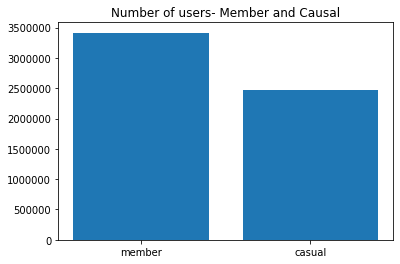

In [64]:
plt.title("Number of users- Member and Causal")
plt.bar(member_type.index, member_type.values)
plt.ticklabel_format(style='plain', axis='y')

This is just to show there are more members using the bikes than the casual but there are still a lot of casual customers who aren;t a member. Now, let's graph the number of rides per day between members and casuals

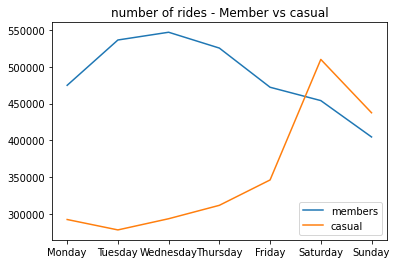

In [65]:
plt.title("number of rides - Member vs casual")
plt.plot(member_rides_per_day)
plt.plot(casual_rides_per_day)
plt.legend(['members','casual'])

This confims what we already found out that members are using the bikes more often during the weekday and the casuals are using the bikes more during the weekend. It also shows Saturday has the biggest data points.

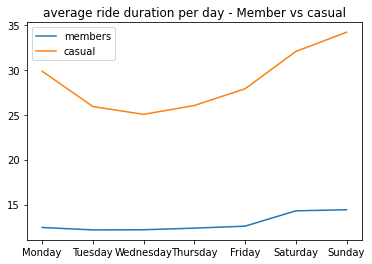

In [66]:
plt.title("average ride duration per day - Member vs casual")
plt.plot(member_rides_avg.dt.total_seconds()/60) # pd.Timedelta(minutes=1)
plt.plot(casual_rides_avg.dt.total_seconds()/60)
plt.legend(['members','casual'])

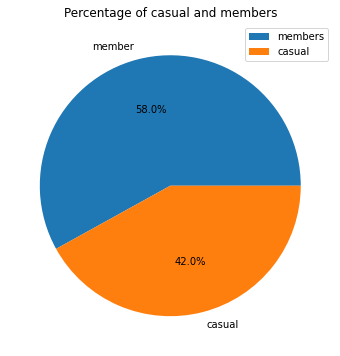

In [67]:
plt.figure(figsize=(6,6))
plt.title('Percentage of casual and members')
plt.pie(member_type.values,labels = member_type.index,autopct='%1.1f%%')
plt.legend(['members','casual'])

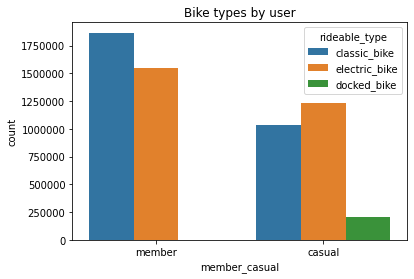

In [68]:
plt.title('Bike types by user')
sns.countplot(x="member_casual", hue="rideable_type", data=frame)
plt.ticklabel_format(style='plain', axis='y') # for removing #scientific notation

In [69]:
#frame.to_csv('hello.csv', encoding='utf-8', index=False)

# **SHARE**

Despite doing some graphs in Python using matploblib and seaborn, I still decide to plot some graphs using Tableau, just to improve my skills.

In [70]:
import matplotlib.image as mpimg

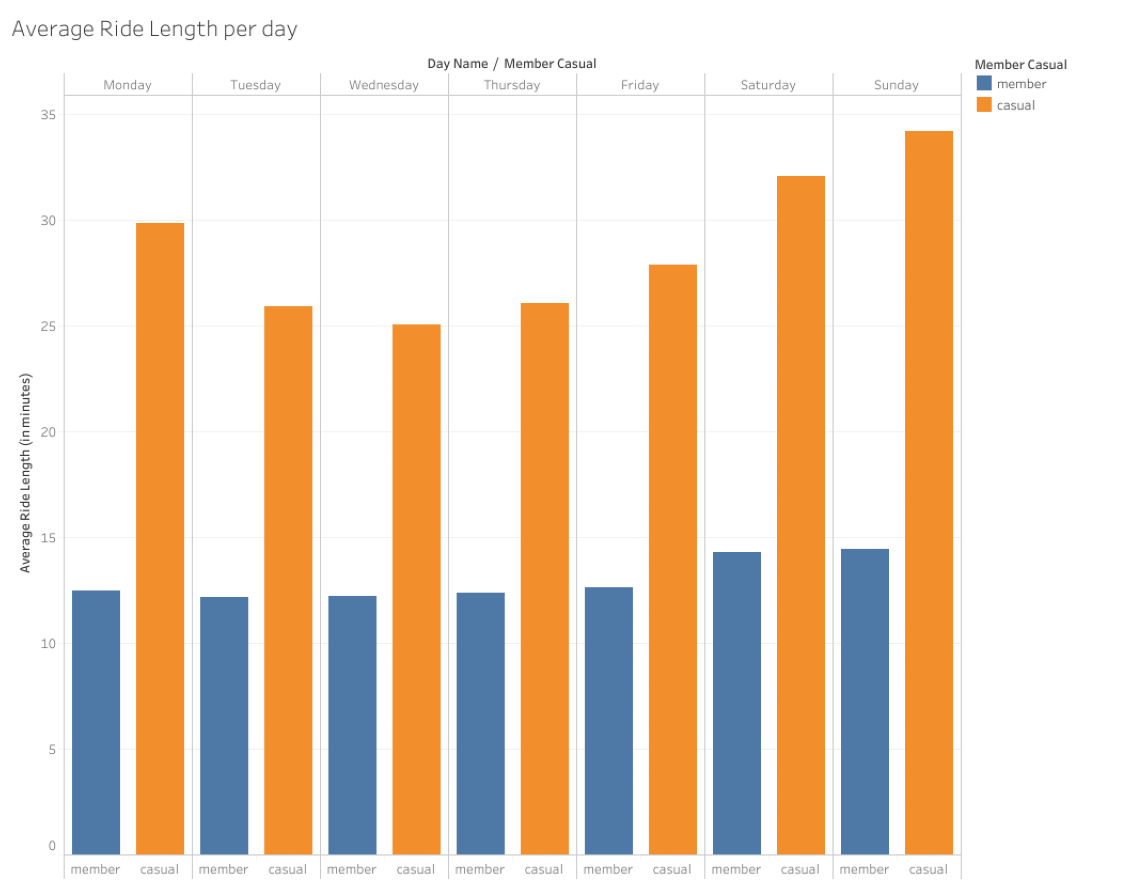

In [71]:
img = mpimg.imread('../input/pictures/Average Ride Length per day.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

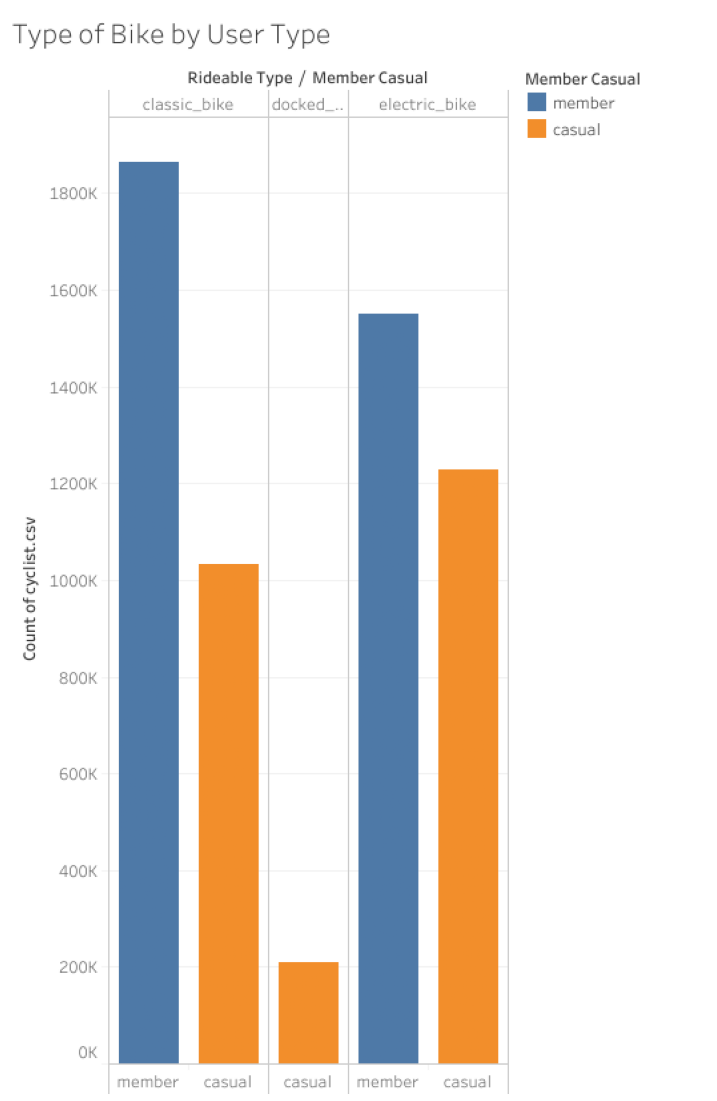

In [72]:
img = mpimg.imread('../input/pictures/Bike Types by user.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

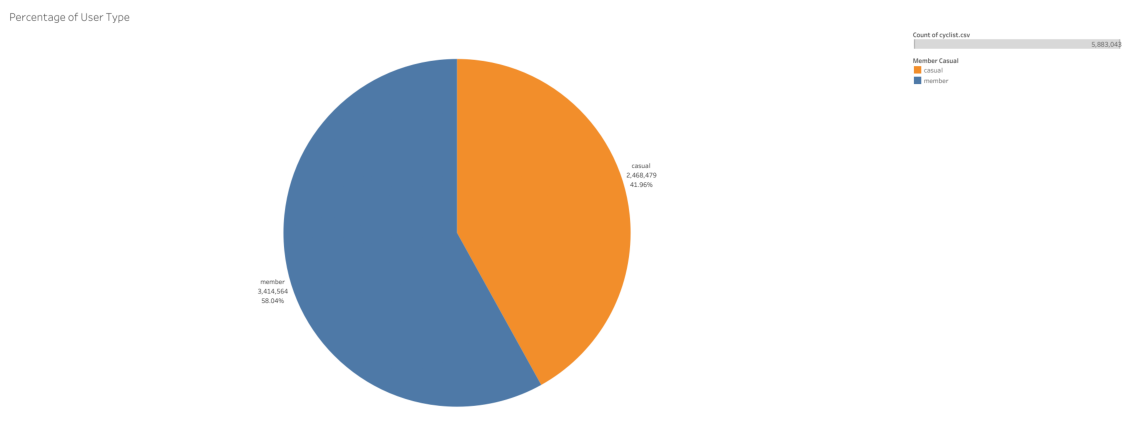

In [73]:
img = mpimg.imread('../input/pictures/Percentage of User.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

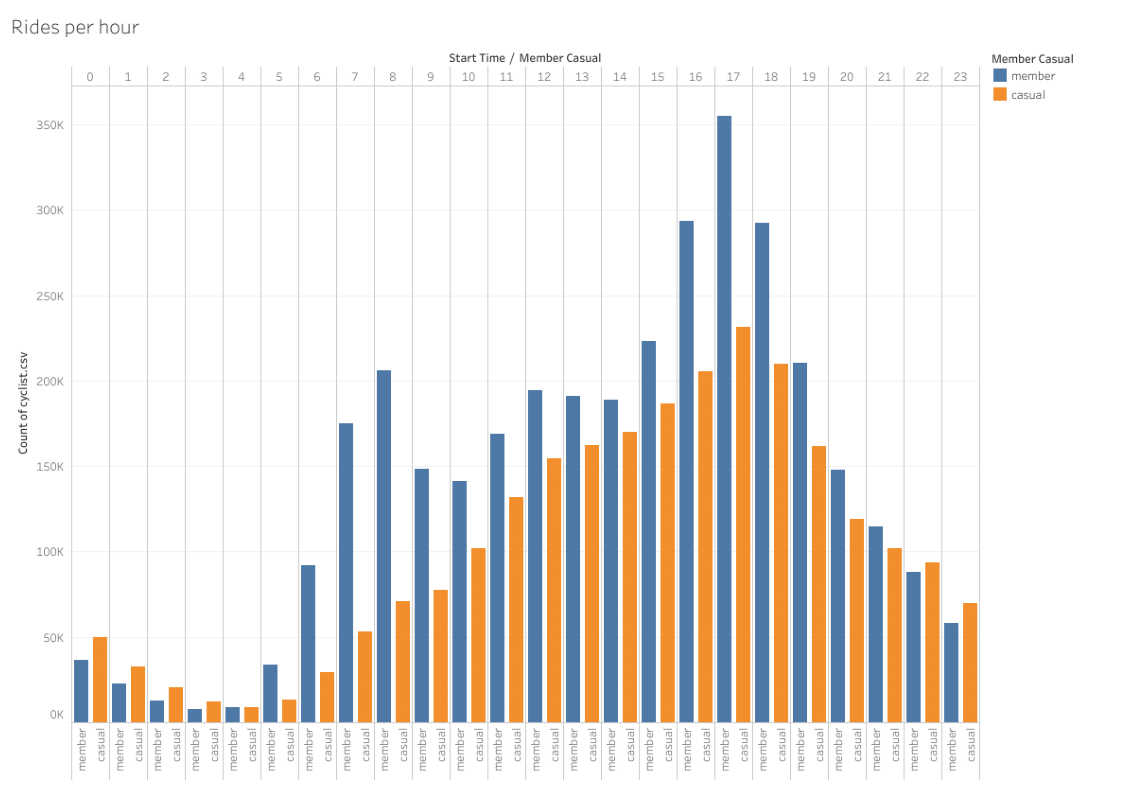

In [74]:
img = mpimg.imread('../input/pictures/Ride per hour by user.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

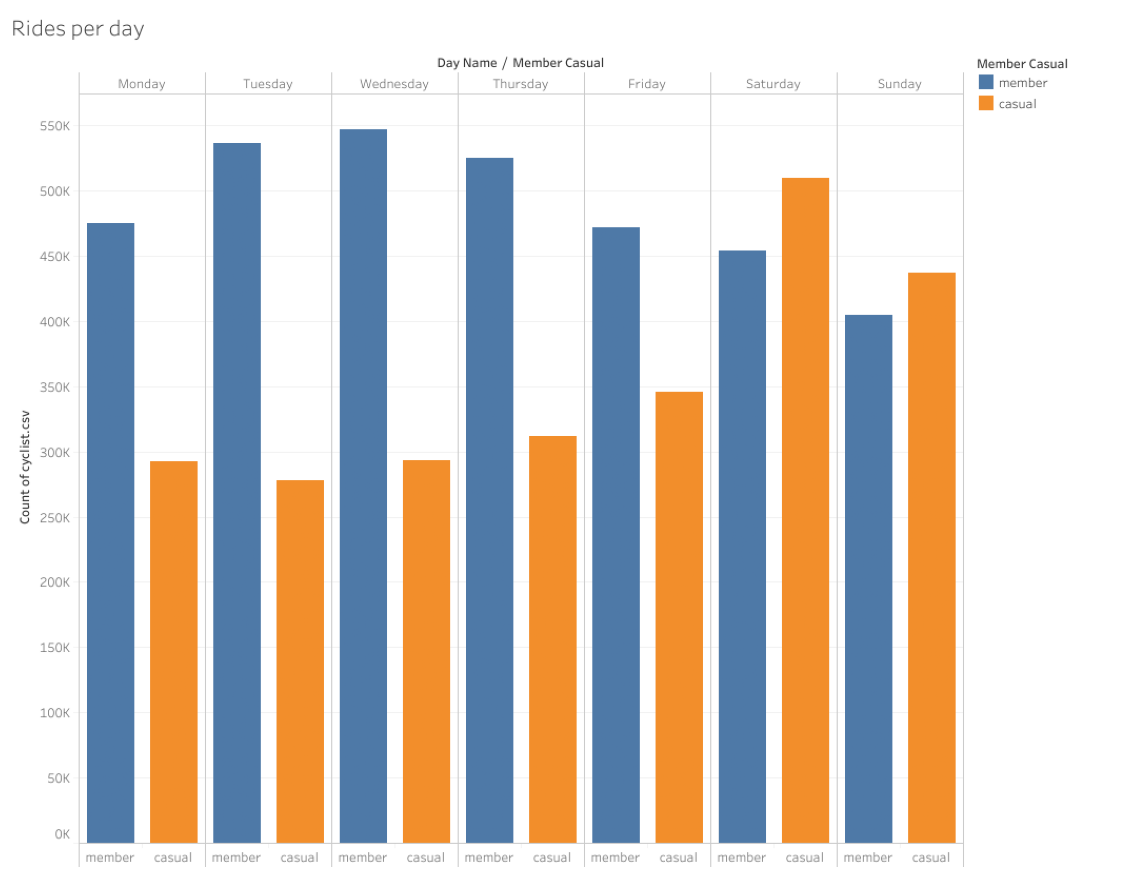

In [75]:
img = mpimg.imread('../input/pictures/Ride per day by user.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

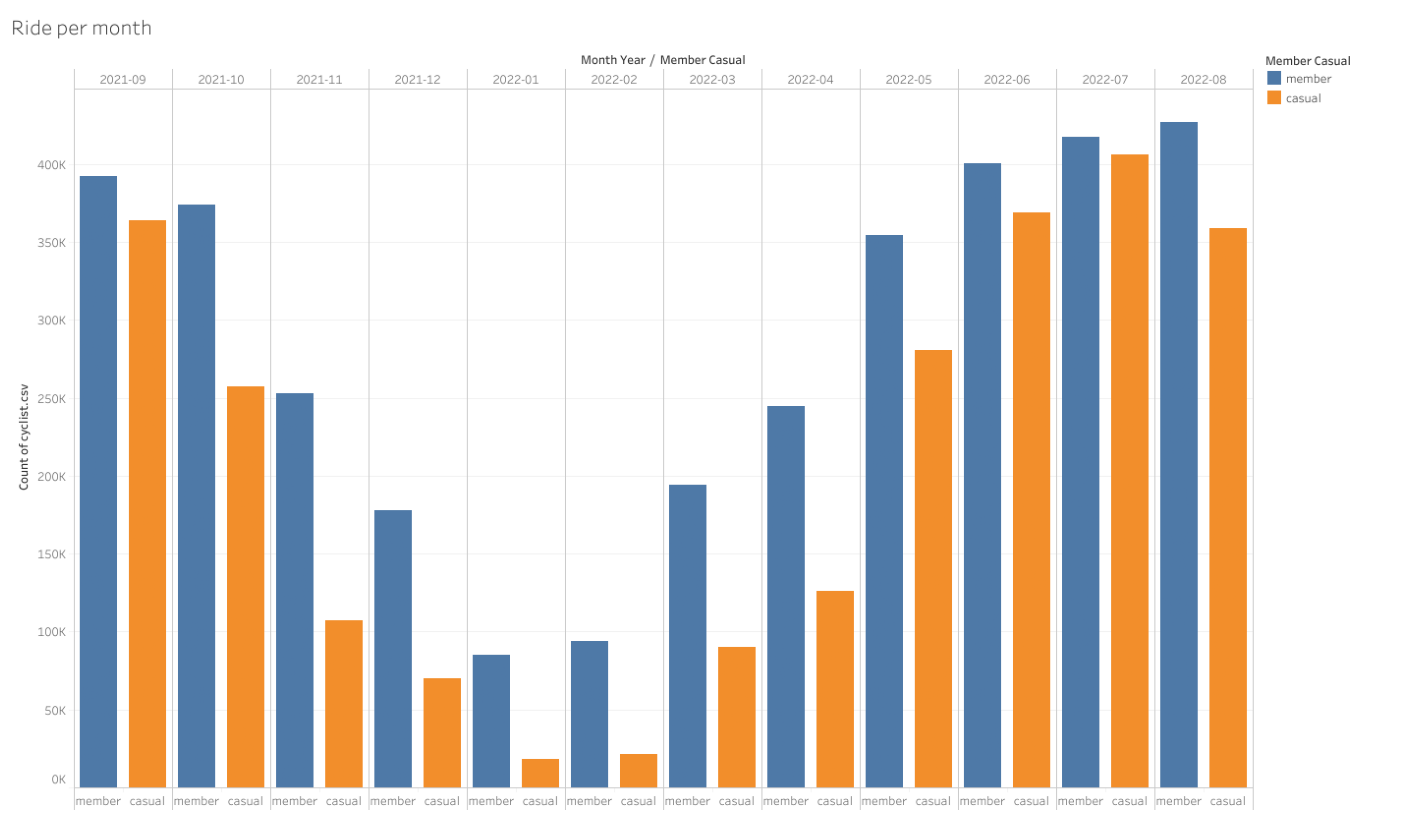

In [76]:
img = mpimg.imread('../input/pictures/Ride per month by user.png')
plt.figure(figsize=(25,25))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Huge decrease of users during winter, Largest amount of users during the summer.

* Members consist most of the data, 16% more than the casuals.
* July has the most data points and in all of the months, members have more data than the casuals (more rides than the casual) but that could be due to being more members than casuals in the first place.
* The difference in proportion of rides is in November
* Temperature/ Seasons affect the volume of rides
* More volume of rides during the weekend than the weekday
* More volume of rides during the afternoon, mainly at 5pm.

* Casuals ride longer than members
* More casuals than members between 10pm - 4am.
* More members than casuals between 5am - 9pm
* Members don't use docked bikes
* Members have a perference for classic bikes

**The 3 main takeaway**
* Members use the bikes for fixed activities, like going to work or using for exercise.
* Bikes are used for recreation on the weekends. 
* Rides are influenced by temperature / seasons.


# **ACT:**

The acting phase will be done by the marketing teams but the main 3 ideas are that 
*  Members use the bikes for fixed activities, like going to work or using for exercise.
*  Bikes are used for recreation on the weekends.
*  Rides are influenced by temperature / seasons.

The marketing team can build a marketing campaign focusing on show how bikes help people to get to work, while using the idea that they can be used for exercise and to avoid traffic. The ads could be show on professional social networks.
There should be some entices to using the bikes during winter, like discounts or coupons
Given that the bikes are used for recreation on the weekends, there could be a discount for a family or a group of friends (multiple group of people), allowing them to be used together. 